Download the train and test dataset

In [43]:
import os
import urllib.request
z = os.listdir("zip.train.gz")
print(z)
'''
urllib.request.urlretrieve("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz","zip.train.gz")
urllib.request.urlretrieve("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz", "zip.test.gz")
'''

NotADirectoryError: ignored

In [20]:
import numpy as np
import gzip
def read_gzip(file_name):
    f=gzip.open(file_name,"rb")
    labels = []
    images = []
    cnt = 0;
    while True:
      l = f.readline()
      if not l:
        break;
      l = str(l)
      n = len(l)
      l = l[2:n-3]
      l1 = l.split(' ')
      labels.append(round(float((l1[0]))))
      im1 = []
      for k in range(1,257):
          im1.append(float(l1[k]))
      im2 = (np.array(im1)+1)/2
      images.append(im2)
    return np.array(labels), np.array(images)

In [21]:
post_train_labels, post_train_images = read_gzip("./zip.train.gz")
post_test_labels, post_test_images = read_gzip("./zip.test.gz")
print("Length of training dataset = ", end=' ')
print(len(post_train_labels))
print("Length of test dataset = ", end=' ')
print(len(post_test_labels))

Length of training dataset =  7291
Length of test dataset =  2007


Display a train image

label = 7


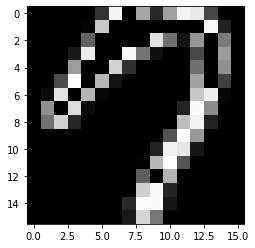

In [22]:
n = 10
print('label = '+str(post_train_labels[n]))
img = (post_train_images[n]*256).reshape([16,16]).astype('uint8')
import matplotlib.pyplot as plt
plt.imshow(img, cmap = 'gray')
plt.show()

**Import Tensorflow and Keras**

In [23]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

**Format the images for Keras**

In [24]:
from tensorflow.keras import backend as K
if K.image_data_format() == 'channels_first':
  train_images = post_train_images.reshape(post_train_images.shape[0],1,16,16)
  test_images = post_test_images.reshape(post_test_images.shape[0],1,16,16)
  input_shape = (1,16,16)
else:
  train_images = post_train_images.reshape(post_train_images.shape[0],16,16,1)
  test_images = post_test_images.reshape(post_test_images.shape[0],16,16,1)
  input_shape = (16,16,1)

One Hot Encoding of the Output

In [25]:
train_labels = tensorflow.keras.utils.to_categorical(post_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(post_test_labels, 10)
n = 100
print(post_train_labels[n])
print(train_labels[n])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Define the CNN Layers

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(16,16,1)))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.5))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
'''
# A hidden layer to learn with
model.add(Dense(64, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
'''
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

Compile the Model

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Start Training (Use GPU Accelerator)**

In [40]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(7291, 16, 16, 1)
(7291, 10)
(2007, 16, 16, 1)
(2007, 10)


In [41]:
history = model.fit(train_images, train_labels,
                    batch_size=128,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
57/57 - 0s - loss: 0.9777 - accuracy: 0.6826 - val_loss: 0.3867 - val_accuracy: 0.8829
Epoch 2/10
57/57 - 0s - loss: 0.3653 - accuracy: 0.8852 - val_loss: 0.2865 - val_accuracy: 0.9158
Epoch 3/10
57/57 - 0s - loss: 0.2457 - accuracy: 0.9258 - val_loss: 0.2246 - val_accuracy: 0.9392
Epoch 4/10
57/57 - 0s - loss: 0.1867 - accuracy: 0.9423 - val_loss: 0.2039 - val_accuracy: 0.9432
Epoch 5/10
57/57 - 0s - loss: 0.1555 - accuracy: 0.9552 - val_loss: 0.2059 - val_accuracy: 0.9472
Epoch 6/10
57/57 - 0s - loss: 0.1386 - accuracy: 0.9589 - val_loss: 0.1844 - val_accuracy: 0.9547
Epoch 7/10
57/57 - 0s - loss: 0.1071 - accuracy: 0.9689 - val_loss: 0.1776 - val_accuracy: 0.9497
Epoch 8/10
57/57 - 0s - loss: 0.0968 - accuracy: 0.9706 - val_loss: 0.1891 - val_accuracy: 0.9537
Epoch 9/10
57/57 - 0s - loss: 0.0865 - accuracy: 0.9756 - val_loss: 0.1910 - val_accuracy: 0.9517
Epoch 10/10
57/57 - 0s - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.1734 - val_accuracy: 0.9606


**Test the model**

In [42]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.173350989818573
Test accuracy: 0.9606377482414246
